In [101]:
import os
os.environ['USE_PYGEOS'] = '0'
import geopandas as gpd

In [115]:
import mapclassify
from pathlib import Path
import matplotlib.pyplot as plt

In [11]:
NOTEBOOK_PATH = Path().resolve()
DATA_DIRECTORY = NOTEBOOK_PATH / "data"

In [16]:
grid = geopandas.read_file(
    DATA_DIRECTORY
    / "helsinki_region_travel_times_to_railway_station"
    / "helsinki_region_travel_times_to_railway_station.gpkg"
)
grid.head()

,car_m_d,car_m_t,car_r_d,car_r_t,from_id,pt_m_d,pt_m_t,pt_m_tt,pt_r_d,pt_r_t,pt_r_tt,to_id,walk_d,walk_t,geometry
0,32297,43,32260,48,5785640,32616,116,147,32616,108,139,5975375,32164,459,"POLYGON ((382000.000 6697750.000, 381750.000 6..."
1,32508,43,32471,49,5785641,32822,119,145,32822,111,133,5975375,29547,422,"POLYGON ((382250.000 6697750.000, 382000.000 6..."
2,30133,50,31872,56,5785642,32940,121,146,32940,113,133,5975375,29626,423,"POLYGON ((382500.000 6697750.000, 382250.000 6..."
3,32690,54,34429,60,5785643,33233,125,150,33233,117,144,5975375,29919,427,"POLYGON ((382750.000 6697750.000, 382500.000 6..."
4,31872,42,31834,48,5787544,32127,109,126,32127,101,121,5975375,31674,452,"POLYGON ((381250.000 6697500.000, 381000.000 6..."


In [20]:
helsinki = geopandas.read_file(
    DATA_DIRECTORY / "helsinki_municipality" / "helsinki_municipality.gpkg"
)
helsinki

,GML_ID,NAMEFIN,NAMESWE,NATCODE,geometry
0,27517366,Helsinki,Helsingfors,091,"POLYGON ((399936.363 6684600.244, 399937.630 6..."


<AxesSubplot: >

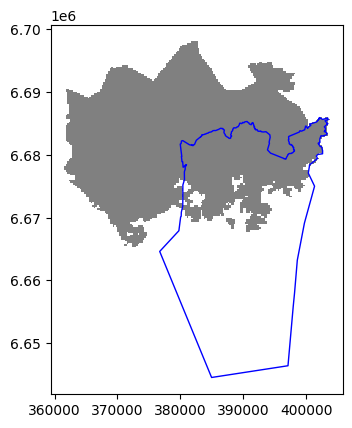

In [21]:
ax = grid.plot(facecolor="gray")
helsinki.plot(ax=ax, facecolor="None", edgecolor="blue")

In [79]:
intersection = grid.overlay(helsinki, how="intersection")
intersection.shape

(3826, 19)

In [80]:
intersection.to_file(
    DATA_DIRECTORY / "intersection.gpkg",
    layer="travel_time_matrix_helsinki_region"
)

In [88]:
dissolved = intersection.dissolve(by="car_r_t")
dissolved.shape

(51, 18)

In [89]:
amazon = geopandas.read_file(DATA_DIRECTORY / "amazon_river" / "amazon_river.gpkg")
amazon.head()

,bbox_east,bbox_north,bbox_south,bbox_west,place_name,geometry
0,-49.10927,0.70653,-4.44219,-73.450126,"Rio Amazonas, Microrregião de Manaus, Mesorreg...","MULTILINESTRING ((1612358.589 9508606.173, 161..."


<AxesSubplot: >

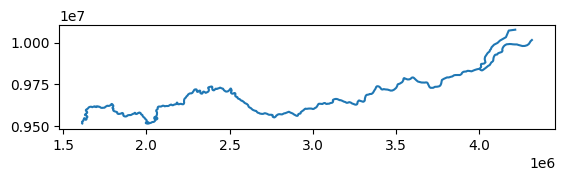

In [90]:
amazon.plot()

In [91]:
amazon['simplegeom'] = amazon.simplify(tolerance=20000)

<AxesSubplot: >

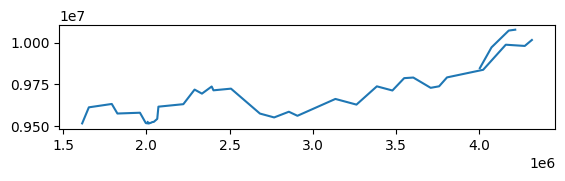

In [94]:
amazon["simplegeom"].plot()

In [95]:
grid.head()

,car_m_d,car_m_t,car_r_d,car_r_t,from_id,pt_m_d,pt_m_t,pt_m_tt,pt_r_d,pt_r_t,pt_r_tt,to_id,walk_d,walk_t,geometry
0,32297,43,32260,48,5785640,32616,116,147,32616,108,139,5975375,32164,459,"POLYGON ((382000.000 6697750.000, 381750.000 6..."
1,32508,43,32471,49,5785641,32822,119,145,32822,111,133,5975375,29547,422,"POLYGON ((382250.000 6697750.000, 382000.000 6..."
2,30133,50,31872,56,5785642,32940,121,146,32940,113,133,5975375,29626,423,"POLYGON ((382500.000 6697750.000, 382250.000 6..."
3,32690,54,34429,60,5785643,33233,125,150,33233,117,144,5975375,29919,427,"POLYGON ((382750.000 6697750.000, 382500.000 6..."
4,31872,42,31834,48,5787544,32127,109,126,32127,101,121,5975375,31674,452,"POLYGON ((381250.000 6697500.000, 381000.000 6..."


In [97]:
grid = grid.loc[grid["pt_r_tt"] >=0]

<AxesSubplot: >

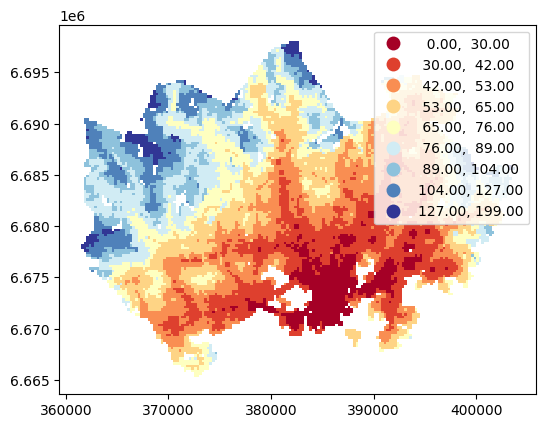

In [99]:
grid.plot(column="pt_r_tt", scheme="Natural_Breaks", k=9, cmap="RdYlBu", linewidth=0, legend=True)

<AxesSubplot: >

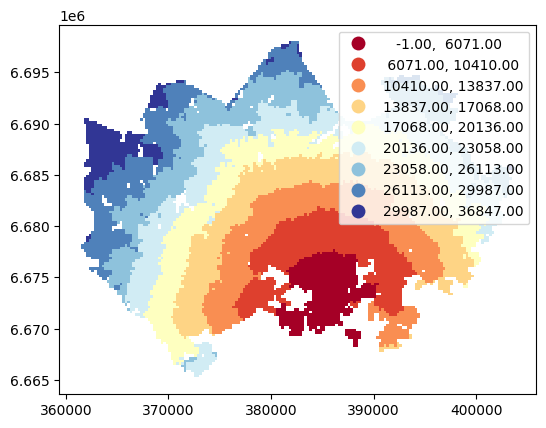

In [100]:
grid.plot(column="walk_d", scheme="Natural_Breaks", k=9, cmap="RdYlBu", linewidth=0, legend=True)

In [103]:
mapclassify.NaturalBreaks(y=grid["pt_r_tt"], k=9)

NaturalBreaks

    Interval       Count
------------------------
[  0.00,  29.00] |   736
( 29.00,  41.00] |  1938
( 41.00,  51.00] |  2392
( 51.00,  63.00] |  2336
( 63.00,  76.00] |  1900
( 76.00,  89.00] |  1602
( 89.00, 103.00] |  1079
(103.00, 125.00] |   811
(125.00, 199.00] |   226

In [104]:
mapclassify.Quantiles(y=grid["pt_r_tt"])

Quantiles

    Interval       Count
------------------------
[  0.00,  41.00] |  2674
( 41.00,  52.00] |  2576
( 52.00,  66.00] |  2623
( 66.00,  85.00] |  2616
( 85.00, 199.00] |  2531

In [105]:
classifier = mapclassify.NaturalBreaks(y=grid["pt_r_tt"], k=9)
classifier.bins

array([ 32.,  44.,  54.,  65.,  78.,  92., 108., 129., 199.])

In [106]:
classifier = mapclassify.NaturalBreaks.make(k=9)

In [108]:
classifications = grid[["pt_r_tt"]].apply(classifier)

In [109]:
classifications.head()

,pt_r_tt
0,8
1,8
2,8
3,8
4,7


In [110]:
# Rename the column so that we know that it was classified with natural breaks
grid["nb_pt_r_tt"] = grid[["pt_r_tt"]].apply(classifier)

# Check the original values and classification
grid[["pt_r_tt", "nb_pt_r_tt"]].head()

,pt_r_tt,nb_pt_r_tt
0,139,8
1,133,8
2,133,8
3,144,8
4,121,7


<AxesSubplot: >

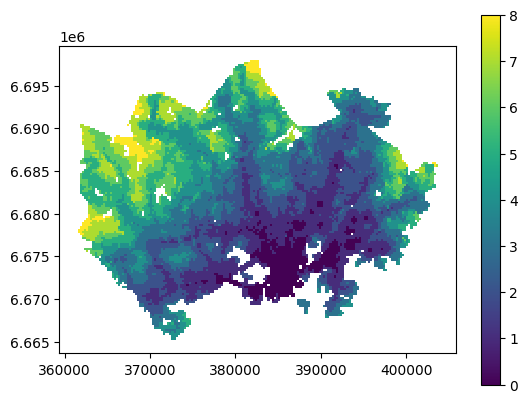

In [112]:
grid.plot(column="nb_pt_r_tt", linewidth=0, legend=True)

<AxesSubplot: ylabel='Frequency'>

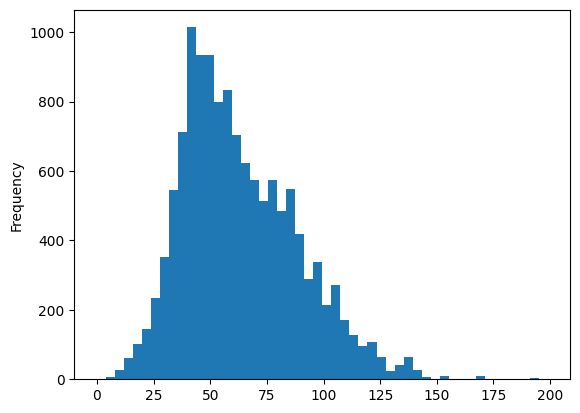

In [113]:
grid["pt_r_tt"].plot.hist(bins=50)

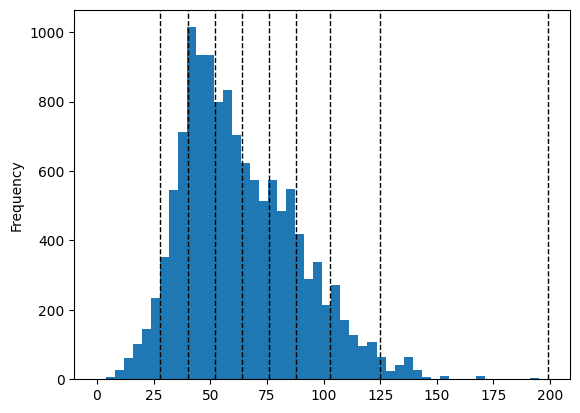

In [116]:
# Define classifier
classifier = mapclassify.NaturalBreaks(y=grid["pt_r_tt"], k=9)

# Plot histogram for public transport rush hour travel time
grid["pt_r_tt"].plot.hist(bins=50)

# Add vertical lines for class breaks
for break_point in classifier.bins:
    plt.axvline(break_point, color="k", linestyle="dashed", linewidth=1)